<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/classification/stacking_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 스태킹(Stacking)
### : 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행하는 방식
- 캐글과 같은 대회에서 높은 순위를 차지하기 위해 조금이라도 성능 수치를 올려야할 경우 자주 사용
- 스태킹을 적용할 때는 많은 개별 모델이 필요함
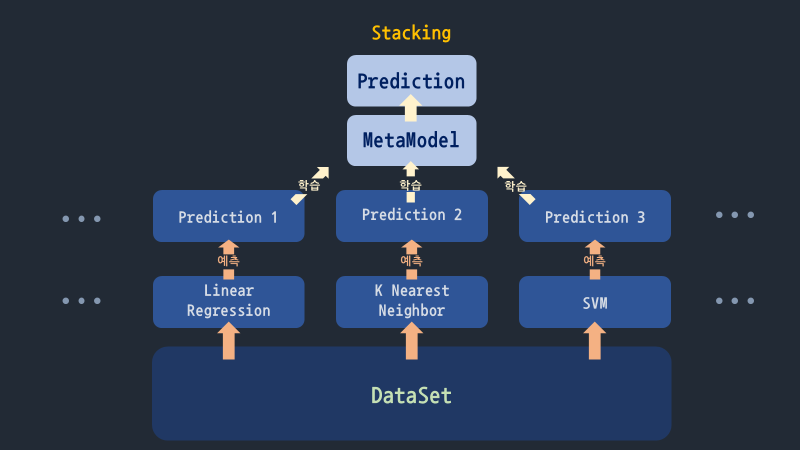

개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어   
별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식
- 이때 개별 모델의 예측된 데이터 세트를 다시 기반으로 하여 학습하고 예측하는 방식을 메타 모델이라고 함



## 스태킹알고리즘 Step
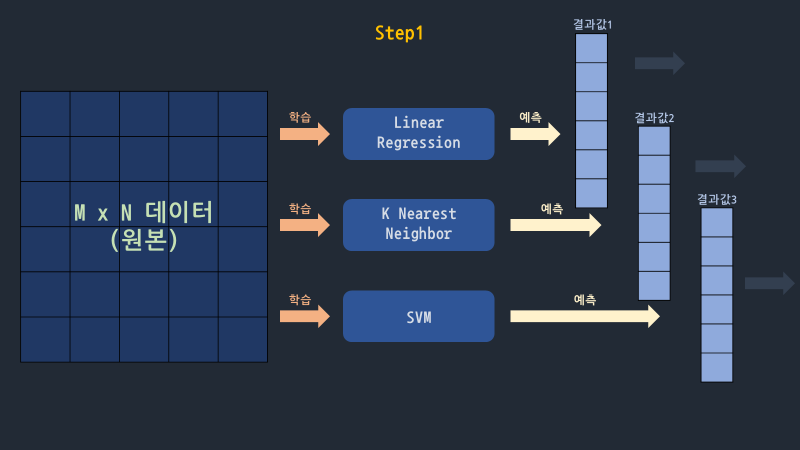

1. M 개의 로우, N개의 피처(칼럼)을 가진 데이터 세트가 존재
2. 3개의 머신러닝 알고리즘 모델을 학습시킨뒤 예측을 수행
3. 각각 M개의 로우를 가진 1개의 레이블 값을 도출

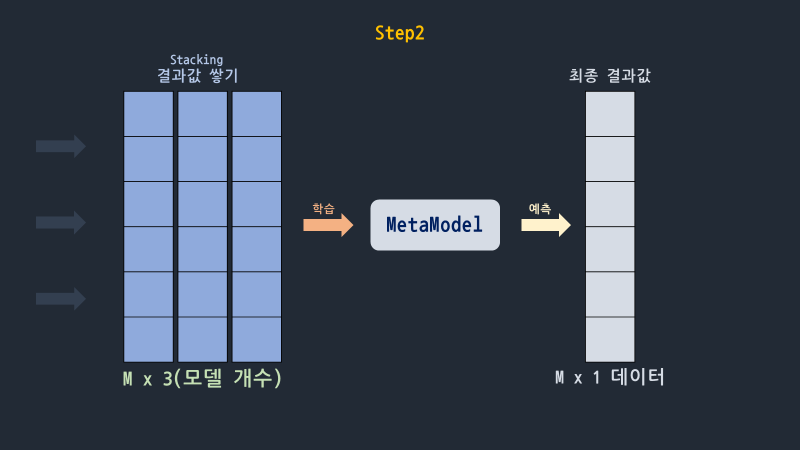

1. 모델별로 도출된 예측 데이터 값을 다시 합침(Stacking)
2. 새로운 데이터에 대하여 모델을 학습
3. 최종 예측

## 기본 스태킹(Stacking) 모델
- 위스콘신 암 데이터 세트에 적용

In [1]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [4]:
#개별 모델 생성
knn = KNeighborsClassifier(n_neighbors=4)
rf = RandomForestClassifier(random_state=0)
dt = DecisionTreeClassifier()
ada = AdaBoostClassifier(n_estimators=100)

#스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

In [12]:
models =  [knn, rf, dt, ada]
results = []
for model in models:
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  print(f"{model.__class__.__name__} 정확도 : {round(accuracy_score(y_test, pred),4)}")
  results.append(pred)


KNeighborsClassifier 정확도 : 0.9211
RandomForestClassifier 정확도 : 0.9649
DecisionTreeClassifier 정확도 : 0.9123
AdaBoostClassifier 정확도 : 0.9561


In [13]:
#개별 모델로 만든 예측 데이터를 이용하여 메타 모델 만들고 학습
predict = np.array(results)
print(predict.shape)

#transpose를 이용하여 행과 열의 위치 교환
pred = np.transpose(predict)
print(pred.shape)

(4, 114)
(114, 4)


In [19]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print("최종 메타 모델의 예측 정확도 : {}".format(round(accuracy_score(y_test, final),4)))

최종 메타 모델의 예측 정확도 : 0.9737


개별 모델의 예측 데이터를 스태킹으로 재구성해 메타 모델에서 학습하고 예측한 결과  
정확도가 97.37%로 개별 모델의 정확도보다 향상되었음  
**하지만 스태킹 기법이 무조건 성능이 좋아진다는 보장은없음**
